# Titanic ML Survival

This project highlights the exploratory data analysis (EDA) and application of the Random Forest Classifier model to predict survival using the Titanic dataset from [Kaggle](https://www.kaggle.com/c/titanic).

### Project Plan:

* Understand nature of data using .info() .describe()
* Exploratory Data Analysis 
* Missing data -> remove or impute?
* Correlation between metrics -> model building, relationship of variables
* Explore interesting themes:
    * Passenger survival based on social class
    * Age distribution with survival
    * Gender survival based on passenger class
* Data preprocessing
    * Train-Test split of training data using Stratified Shuffle Split
    * Data cleaning using estimators in classes connected a pipeline
* Model Selection (Random Forrest Classifier)
    * Apply to Training data
    * Apply to Test data and determine accuracy of model
* Apply model to Test data
* Export as dataframe csv

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# import OS (for jupyter notebook)
import os
os.chdir(r"/Users/jolan/Documents/Python/chdir")

## Import and read data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Data check

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Variable	Definition	Key

survival: Survival	0 = No, 1 = Yes
pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex:	Sex	
Age:	Age in years	
sibsp:	# of siblings / spouses aboard the Titanic	
parch:	# of parents / children aboard the Titanic	
ticket:	Ticket number	
fare:	Passenger fare	
cabin:	Cabin number	
embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [5]:
train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

### Notes: 
Categorical values: Pclass, Sex, Embarked
Numerical: Fare, Parch, SibSp, Age

### Check the shape of the datasets

In [6]:
print('Train: ', train.shape) 
print('Test: ', test.shape)

Train:  (891, 12)
Test:  (418, 11)


### Countplot of Survived (1) and Not Survived (0)

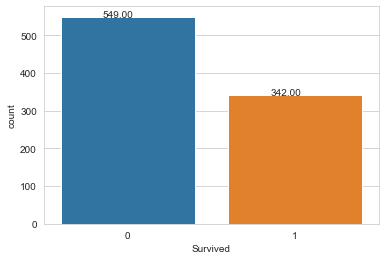

In [7]:
sns.set_style('whitegrid')
ax=sns.countplot(x='Survived', data=train)

for p in ax.patches:
   ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Descriptive Statistics of All data sets

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Exploratory Data Analysis (EDA)

##### Check for the NULL values first

In [10]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

# Visualize Train Set Null Values

<AxesSubplot:>

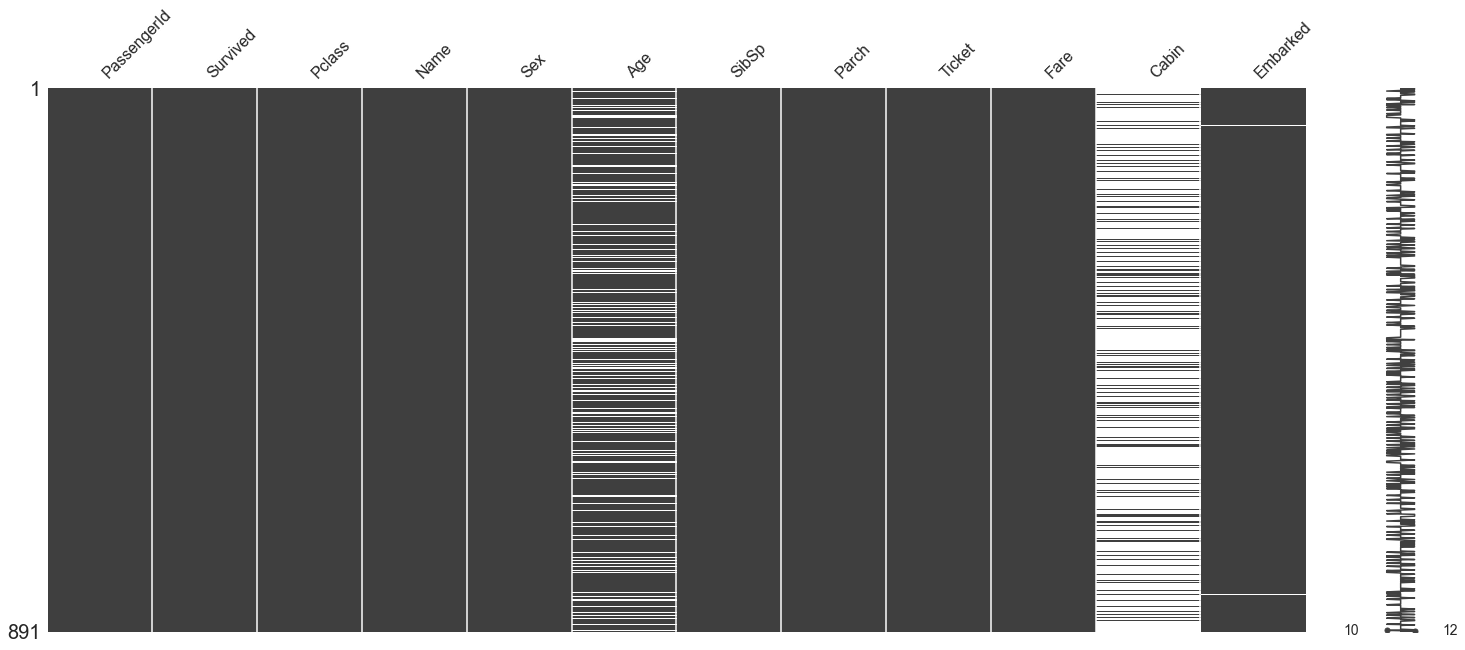

In [12]:
missingno.matrix(train)

# % of Null Values

** if null values are > 30 % of the total column data set, it will be difficult to impute and can result to over fitting. Suggestion: discard. 

In [13]:
print('Null values in Age column: ', round((train['Age'].isna().sum()/len(train['Age']))*100,2), '%')
print('Null values in Cabin column: ', round((train['Cabin'].isna().sum()/len(train['Cabin']))*100,2), '%')
print('Null values in Embarked column: ', round((train['Embarked'].isna().sum()/len(train['Embarked']))*100, 2), '%')

Null values in Age column:  19.87 %
Null values in Cabin column:  77.1 %
Null values in Embarked column:  0.22 %


# Visualize Test Set Null Values

<AxesSubplot:>

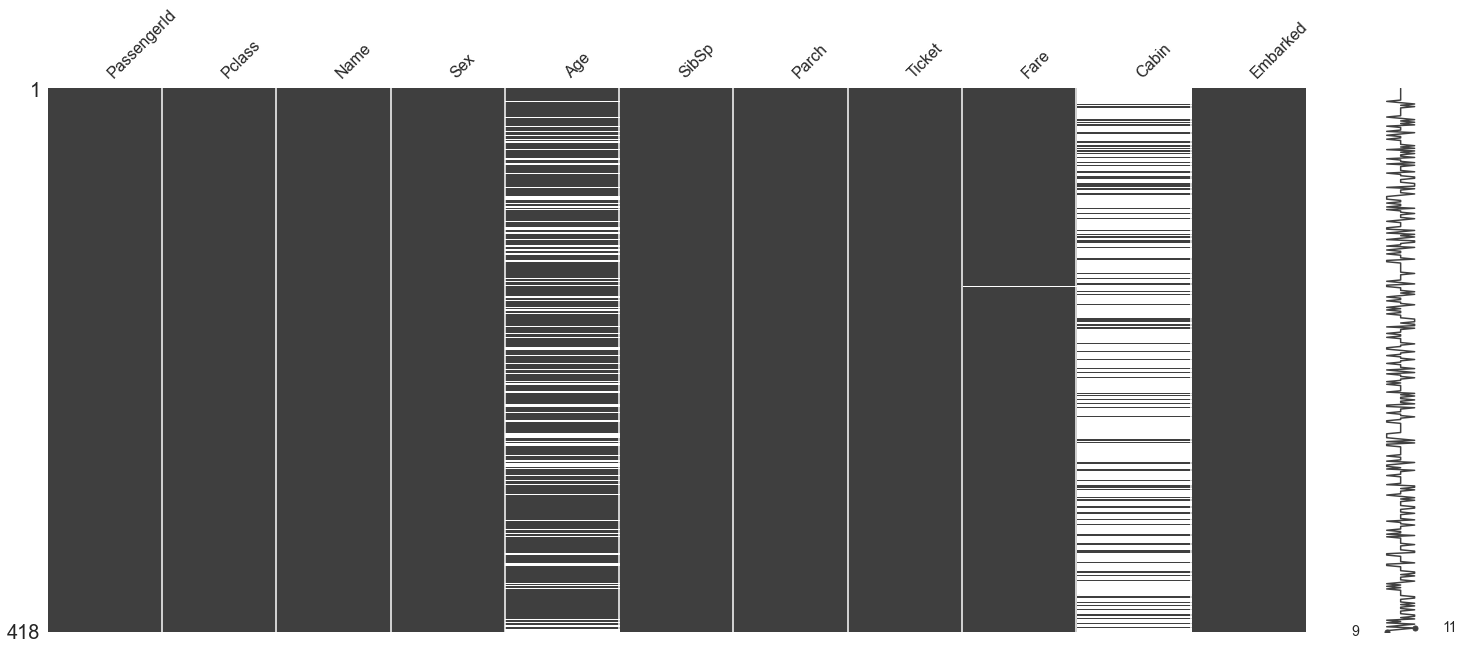

In [14]:
missingno.matrix(test)

# % of Null Values

In [15]:
print('Null values in Age column: ', round((test['Age'].isna().sum()/len(test['Age']))*100, 2), '%')
print('Null values in Cabin column: ', round((test['Cabin'].isna().sum()/len(test['Cabin']))*100, 2), '%')
print('Null values in Embarked column: ',round((test['Fare'].isna().sum()/len(test['Fare']))*100, 2), '%')

Null values in Age column:  20.57 %
Null values in Cabin column:  78.23 %
Null values in Embarked column:  0.24 %


#### NOTE:

'Cabin' feature has > 30% of null values from both train and test sets. Consider to DROP feature.

# EDA: CATEGORICAL VALUES
## Sex (Gender)

In [16]:
train["Sex"].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [17]:
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Survival Probability Plot

Text(0.5, 1.0, 'Survival Probability by Gender')

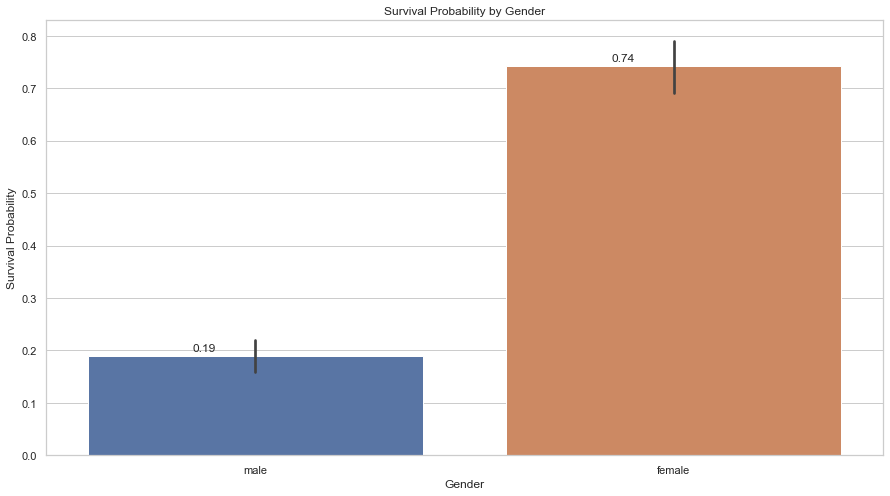

In [18]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.set_style("whitegrid")
genplot = sns.barplot(x="Sex", y="Survived", data=train)
for bar in genplot.patches:
       genplot.annotate('{:.2f}'.format(bar.get_height()), (bar.get_x()+0.25, bar.get_height()+0.01))
plt.xlabel("Gender")
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Gender")

# Count plot of Survival based on Gender

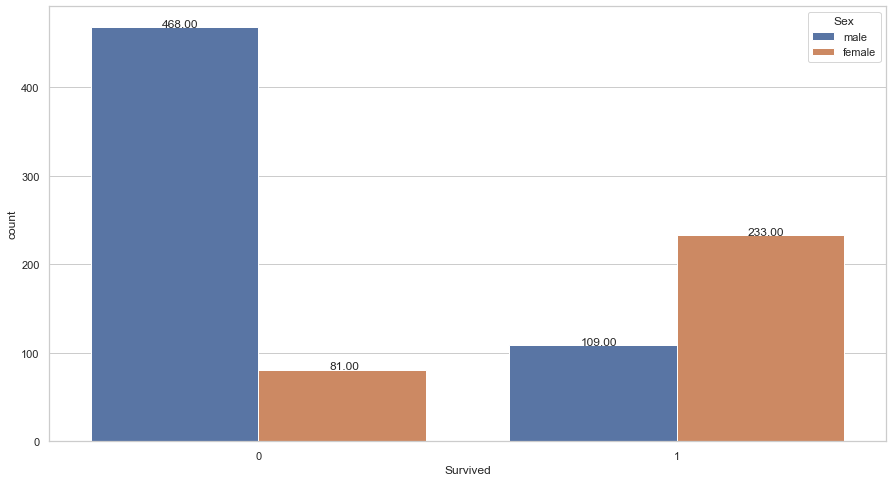

In [19]:
ctplot = sns.countplot(x='Survived', hue='Sex', data=train)
for p in ctplot.patches:
       ctplot.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+.17, p.get_height()+0.1))

### NOTE:

* Higher Male population (572) than Female (309). 
* Survival: 75% (231/309) of Female population; 19% (78/572) of Male population.

# EDA: Passenger Class (Pclass)

In [20]:
train["Pclass"].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

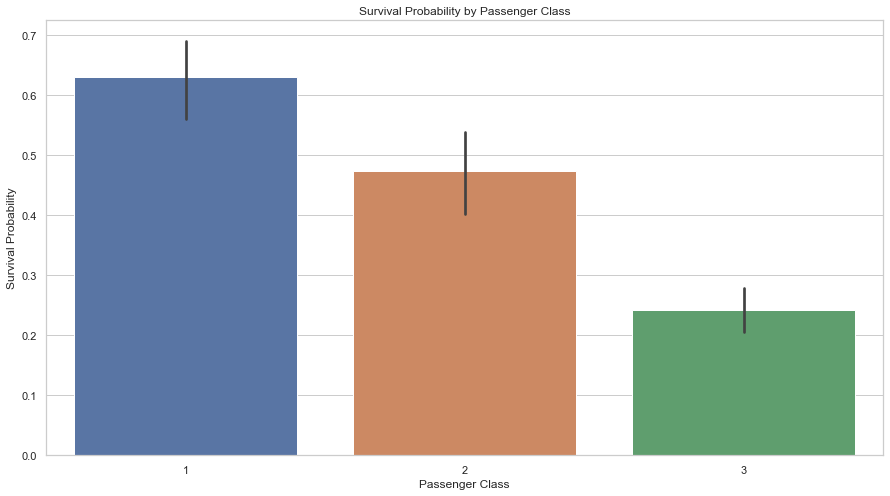

In [22]:
sns.set_style("whitegrid")
sns.barplot(x="Pclass", y="Survived", data=train)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Passenger Class")

<AxesSubplot:xlabel='Survived', ylabel='count'>

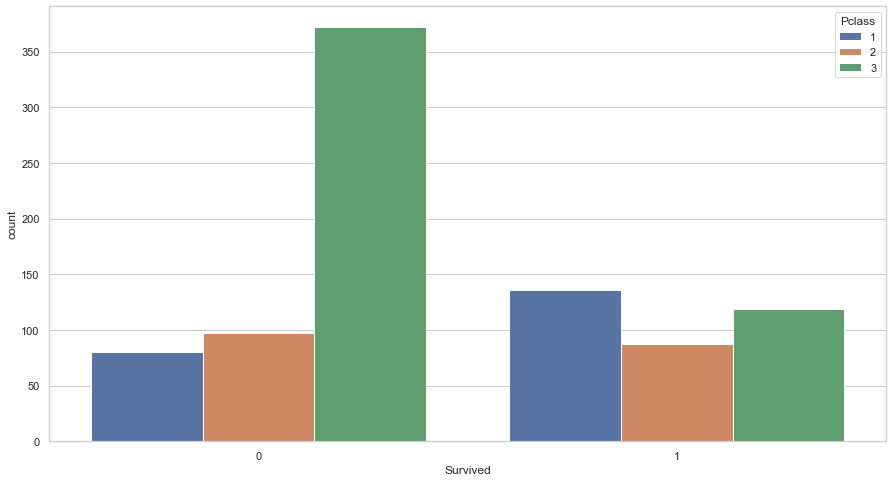

In [23]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='deep')

* Highest survival probability for Class 1 passengers, while lowest survival prob. for Class 3 passengers.

### Combined EDA of PClass and Sex features

Text(0.5, 1.0, 'Survival Probability by Passenger Class and Sex')

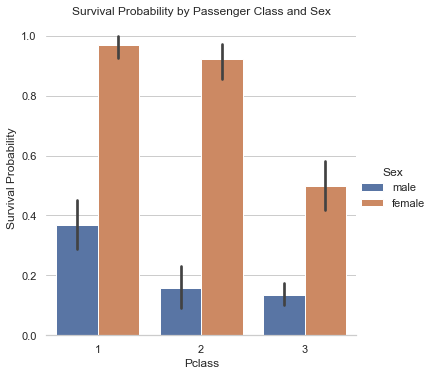

In [24]:
g=sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')
g.despine(left=True)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Passenger Class and Sex")
# plt.savefig("SurvProbPClassGen.jpg",bbox_inches='tight', dpi=200)

* Female passengers have the highest survival probability in all passenger classes.

# EDA: Port of Embarkation (Embarked)

In [25]:
train["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [26]:
train[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

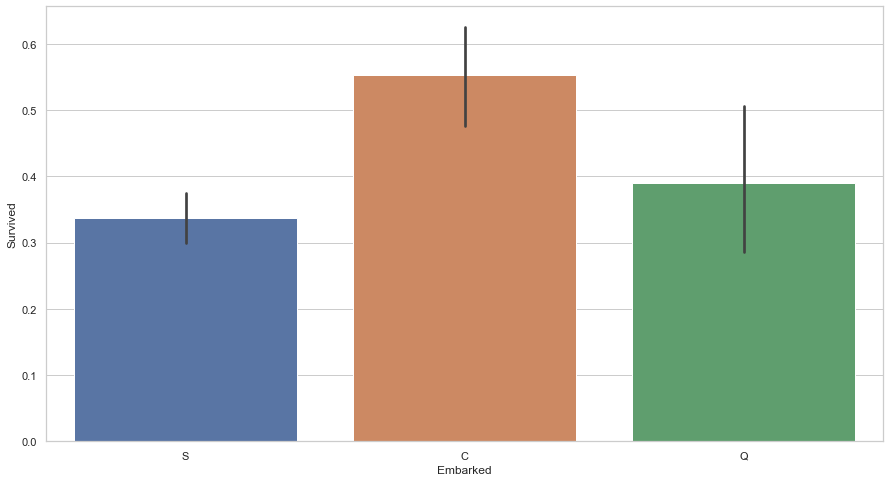

In [27]:
sns.barplot(x="Embarked", y="Survived", data=train)

* Majority of the passengers embarked in S.
* Survival is highest in C and lowest in S. 

Why?

From the previous EDA results, we can hypothesize the following:

- Majority of the passengers who embarked from C are Class 1 ticket holders.
- Most passengers who embarked from S are Class 3 passengers.

We can check this hypothesis using categorical plots.

### CatPlot of Embarked passenger counts based on Pclass 

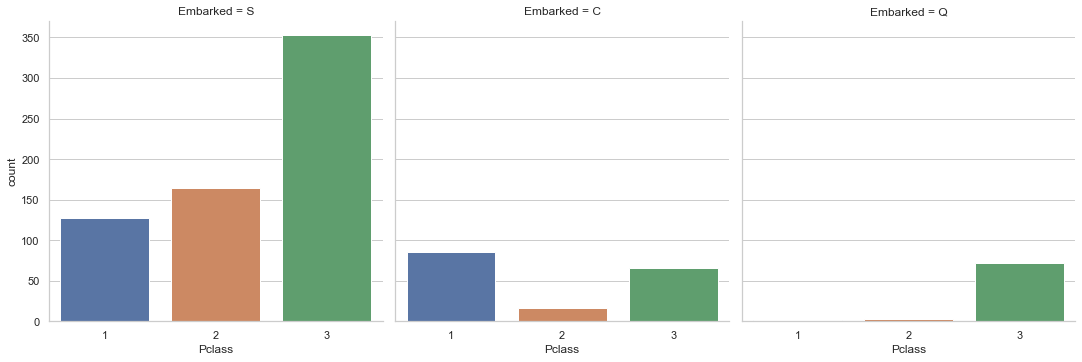

In [28]:
sns.catplot(data=train, x='Pclass', col='Embarked', kind='count')

In [29]:
train.groupby(["Embarked", "Pclass"]).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64

The factorplot and size values confirm our hypothesis that in embarkation "S", most passengers had class 3 tickets. While those who embarked in "C", the highest number of passengers were class 1.

Now let's check the survival probability using the three categorical values (Sex, Pclass, Embarked).

### Combined EDA of Sex, Pclass, and Embarked

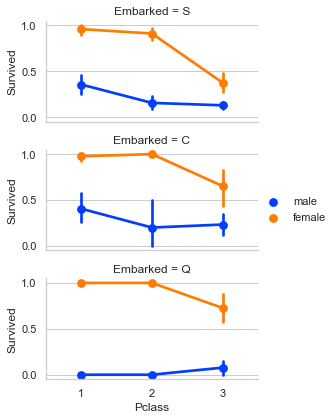

In [30]:
grid = sns.FacetGrid(train, row='Embarked', height=2, aspect=2)
grid.map(sns.pointplot,'Pclass', 'Survived', 'Sex', order=[1,2,3], hue_order=["male","female"], palette='bright')
grid.add_legend()

* Female passengers have higher survival vs. male passengers in all Embarkation Points and Pclass.

* Embarked=S: Male passengers with Pclass=1 have almost similar survival of Female passengers with Pclass=3.





### Passenger count breakdown based on Embarked and Sex

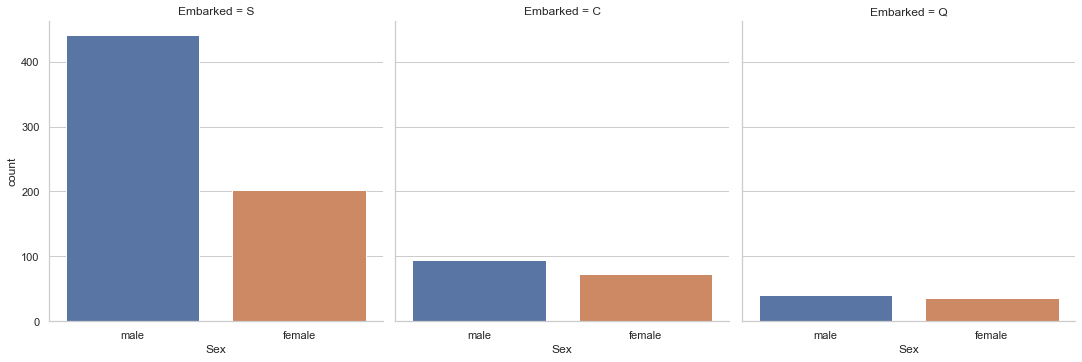

In [31]:
sns.catplot(x='Sex', col='Embarked', data=train, kind='count')

In [32]:
train.groupby(["Embarked", "Sex"]).size()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
dtype: int64

# EDA: NUMERICAL VARIABLES


# Generating Correlation Heatmap for Numerical Variables

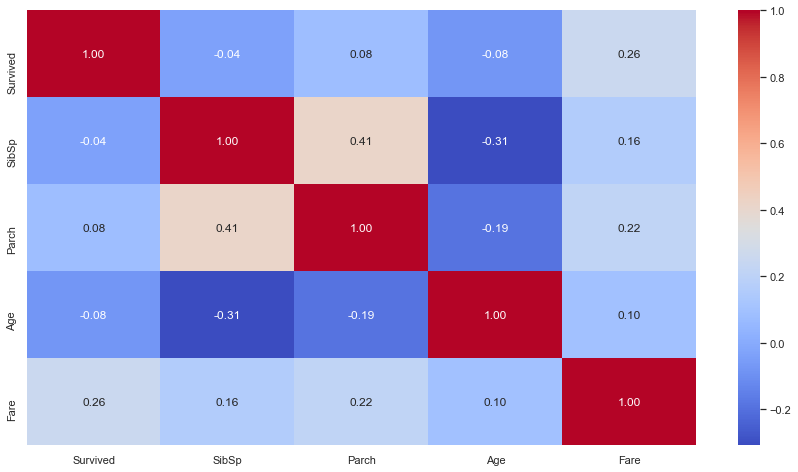

In [33]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.savefig("CorrHeatmap.jpg", dpi=200)

* Analyzing heatmaps can be done vertically or horizontally
* Diagonal (feature correlation with itself = 1)

* Observation: Fare seems to be the only feature that has a substantial correlation with Survived.
* However, there are other features that can be converted to numerical data (binary) such as "Sex" and "Embarked".

#### But before doing that, let's split the training data

## Value counts of SibSp 


In [34]:
train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

## Mean of survival by SibSp


In [35]:
train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

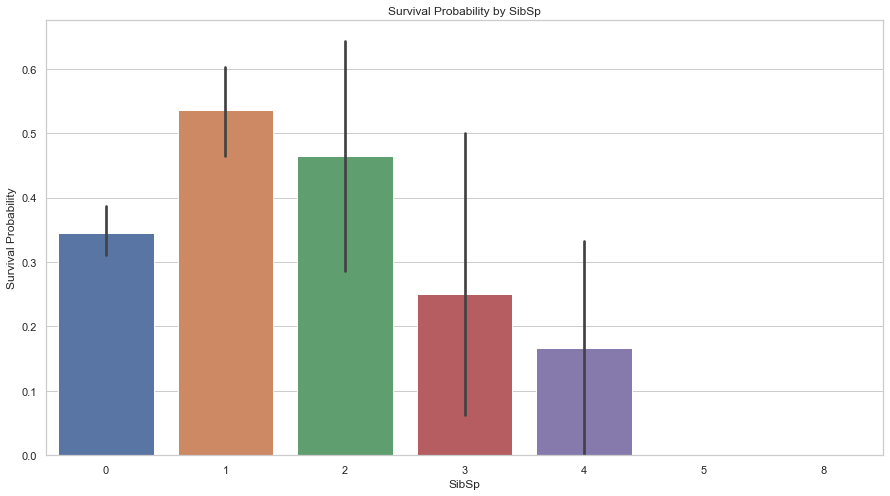

In [36]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

Top 3 survival rates comes from those with 1 SibSp, 2 SibSp, and those who are alone.

Those with >= 3 SibSp has low survival index

## Parch variable counts

In [37]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

## Mean of survival by Parch

In [38]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

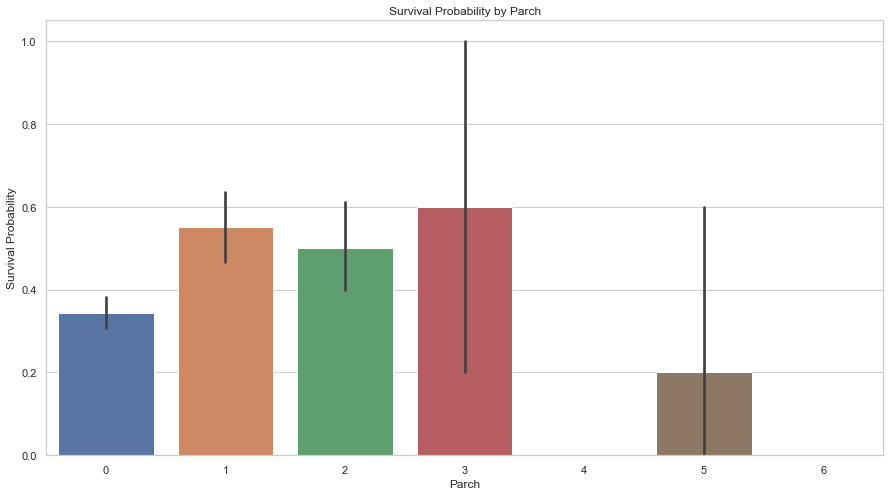

In [39]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

# Age

In [40]:
# Null values in Age column 

train['Age'].isnull().sum()

# value counts is not appropriate bec age ranges from 0 to 80 compared to SibSp where we only have 6 categories

177

# Passenger age distribution


Text(0.5, 1.0, 'Passenger Age Distribution')

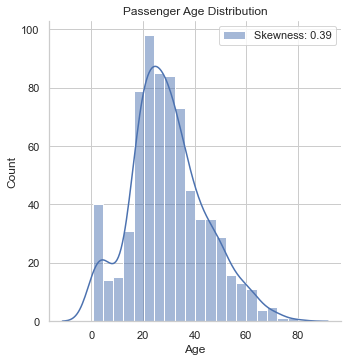

In [41]:

sns.displot(train['Age'], kde=True, kde_kws=dict(cut=3), label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

# Age distribution by survival

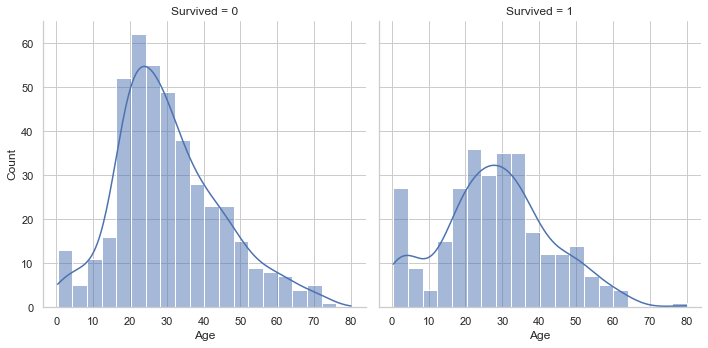

In [42]:
sns.displot(data=train, x='Age', col='Survived', kde=True)

# Stratified Shuffle Split

* Split the TRAIN data set to: 80% for train and 20% for test set

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2) #test_size = * 80% for training and 20% for test
for train_indices, test_indices in split.split(train, train[["Survived", "Pclass", "Sex"]]):
    strat_train_set = train.loc[train_indices]
    strat_test_set = train.loc[test_indices]

## Confirm if split is successful

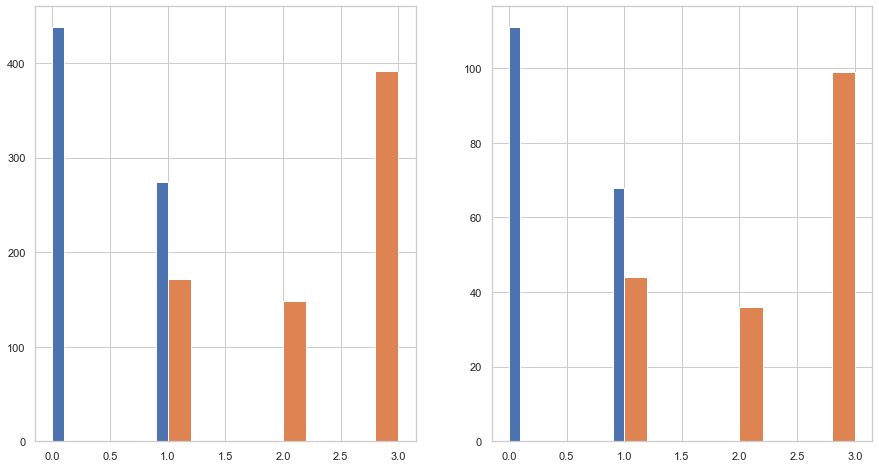

In [44]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

# The distribution of both Train and Test split sets were similar.

In [45]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 584 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          574 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


# Pipeline

* Use estimators to create classes which can impute Nulls, convert object types to binary numericals, and drop features; these classes are connected through a pipeline.

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [47]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
        
        column_names = ["Female", "Male"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        return X

In [48]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(["Embarked", "Name", "Ticket", "Sex", "Cabin", "N"], axis=1, errors="ignore")

In [49]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer", AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                    ("featuredropper", FeatureDropper())])

In [50]:
strat_train_set = pipeline.fit_transform(strat_train_set)

### Check for Null values

In [51]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 584 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


# Scale Data from Pipeline

In [52]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'], axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

# Train the Model (Random Forrest Classifier) 

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

# The GridSearchCV will perform cross val using the RFC with all the values in param_grid to evaluate the model.

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, y_data)

# This will determine the best possible combination for the clf performance.

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [54]:
final_clf = grid_search.best_estimator_

In [55]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=3, n_estimators=200)

# Apply the RFC model to the TEST set

In [56]:
strat_test_set = pipeline.fit_transform(strat_test_set)

In [57]:
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
140,141,0,3,29.075571,0,2,15.2458,1.0,0.0,0.0,1.0,0.0
269,270,1,1,35.000000,0,0,135.6333,0.0,0.0,1.0,1.0,0.0
219,220,0,2,30.000000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
43,44,1,2,3.000000,1,2,41.5792,1.0,0.0,0.0,1.0,0.0
230,231,1,1,35.000000,1,0,83.4750,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30,31,0,1,40.000000,0,0,27.7208,1.0,0.0,0.0,0.0,1.0
179,180,0,3,36.000000,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
833,834,0,3,23.000000,0,0,7.8542,0.0,0.0,1.0,0.0,1.0
678,679,0,3,43.000000,1,6,46.9000,0.0,0.0,1.0,1.0,0.0


In [58]:
X_test = strat_test_set.drop(['Survived'], axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test = y_test.to_numpy()

In [59]:
final_clf.score(X_data_test, y_data_test)

0.8435754189944135

# Apply the model to ENTIRE TRAINING DATA

In [60]:
final_data = pipeline.fit_transform(train)

In [61]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [62]:
X_final = final_data.drop(['Survived'], axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
y_data_final = y_final.to_numpy()

In [63]:
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth": [None, 5, 10], "min_samples_split": [2, 3, 4]}
]

# The GridSearchCV will perform cross val using the RFC with all the values in param_grid to evaluate the model.

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, y_data_final)

# This will determine the best possible combination for the clf performance.

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [64]:
prod_final_clf = grid_search.best_estimator_ 

In [65]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4)

# TEST DATA

In [66]:
final_test_data = pipeline.fit_transform(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB
None


<AxesSubplot:>

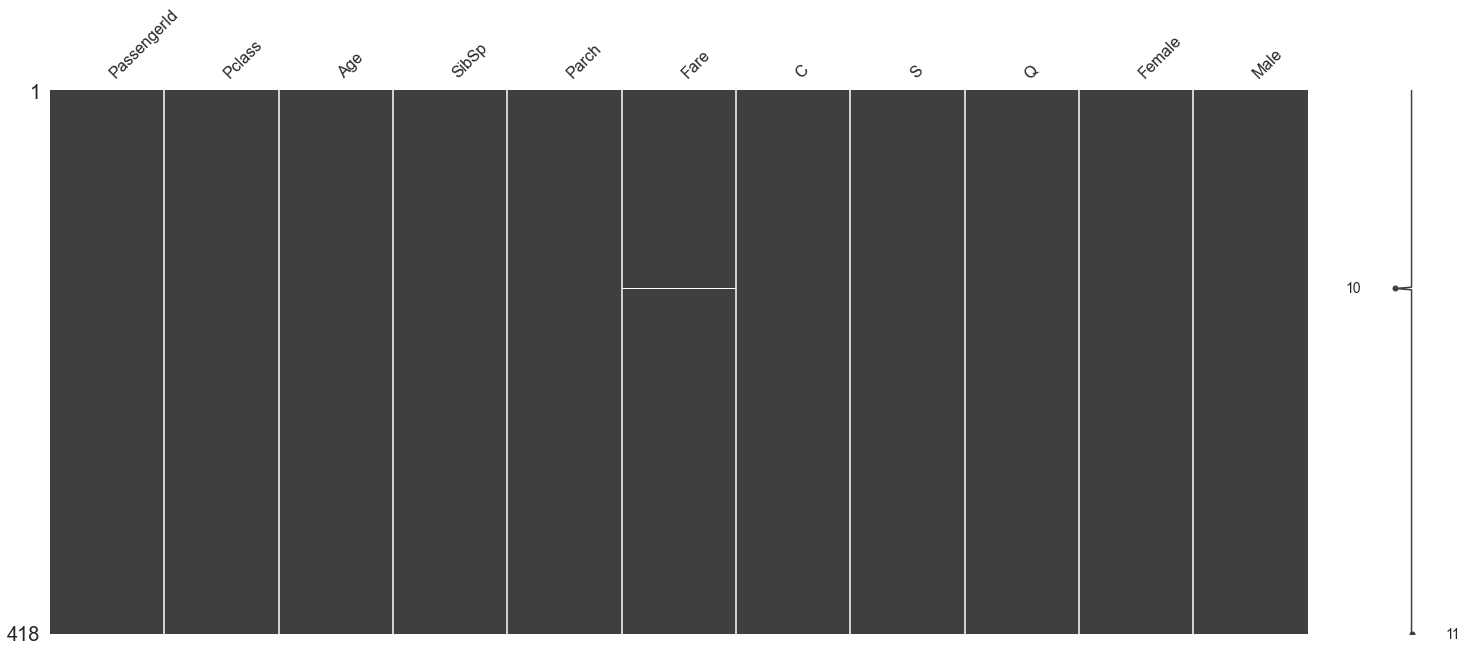

In [67]:
print(final_test_data.info())
missingno.matrix(final_test_data)

We still have a NULL value in Fare. We can use FILL NA method to impute.

In [68]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill") # forward fill, will replace null value with value from previous row

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [69]:
predictions = prod_final_clf.predict(X_data_final_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Make a dataframe of final test

In [72]:
final_df = pd.DataFrame(test['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv(r"/Users/jolan/Documents/Python/chdir/predictions.csv", index=False)

In [73]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
